# 🧙‍♂️ Sample Generation with Pretrained Model + LLLA

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jac-Zac/PML_DL_Final_Project/blob/master/notebooks/notebook_llla.ipynb)

### Initial setup ⚙️

In [1]:
import os
import sys

repo_dir = "PML_DL_Final_Project"

def in_colab():
    # Colab sets this environment variable
    return 'COLAB_GPU' in os.environ

if in_colab():
    # In Colab: clone repo if not present
    if not os.path.exists(repo_dir):
        !git clone https://github.com/Jac-Zac/PML_DL_Final_Project.git
        os.chdir(repo_dir)
        # Install requirements quietly
        !pip install -r requirements.txt -q
    else:
        os.chdir(repo_dir)
        print(f"Repository '{repo_dir}' already exists. Skipping clone.")
else:
    # Local: assume repo is already cloned
    print(f"Local Run, make sure you are inside '{repo_dir}' with the latest updates (git pull).")
    print(f"Moving to root directory to have correct access to all of the files")
    os.chdir("..")

Local Run, make sure you are inside 'PML_DL_Final_Project' with the latest updates (git pull).
Moving to root directory to have correct access to all of the files


### 📦 Imports

In [3]:
import torch
import numpy as np

from src.utils.data import get_dataloaders
from src.models.diffusion import Diffusion
from src.utils.plots import plot_image_grid
from src.utils.environment import get_device, set_seed, load_pretrained_model

# Since on a notebook we can have nicer bars
import tqdm.notebook as tqdm

### 🧪 Setup: Seed and Device

In [4]:
seed = 1337
set_seed(seed)
device = get_device()
os.makedirs("checkpoints", exist_ok=True)

## 💡 Image Generation

#### 🛠️ Configuration Parameters

In [5]:
n_samples = 5
save_dir = "samples"
max_steps = 1000
model_name = "unet"
method = "diffusion"  # or "flow"
ckpt_path = "checkpoints/best_model.pth"  # or use your last checkpoint

#### 🔌 Load Pretrained Model

In [ ]:
import wandb
num_classes = 10  # Total number of class labels (e.g., digits 0–9 for MNIST)

model_kwargs = {
    "num_classes": num_classes,
    "time_emb_dim": 128,  # Must match training config
}
# Model name as expected by your `get_model` function
model_name = "unet"
ckpt_path = "jac-zac/diffusion-project/best-model:v22"

# Load pretrained MAP model using best checkpoint
# By default since I'm passing the path to an artifact it will use Wandb
# Search there direcly via the API
model = load_pretrained_model(
    model_name=model_name,
    ckpt_path=ckpt_path,
    device=device,
    model_kwargs=model_kwargs,
    use_wandb=True,
)

In [12]:
import os

# List files in the artifact directory
files = os.listdir(artifact_dir)
print("Files in artifact:", files)

# Assuming the checkpoint file is the first file
ckpt_file = os.path.join(artifact_dir, files[0])

# Now load your model using your existing load function or framework
model = load_pretrained_model(
    model_name=model_name,
    ckpt_path=ckpt_file,
    device=device,
    model_kwargs=model_kwargs,
)

NameError: name 'artifact_dir' is not defined

#### 💨 Initialize Diffusion Process

Generated 5 samples with labels [0, 1, 2, 3, 4]


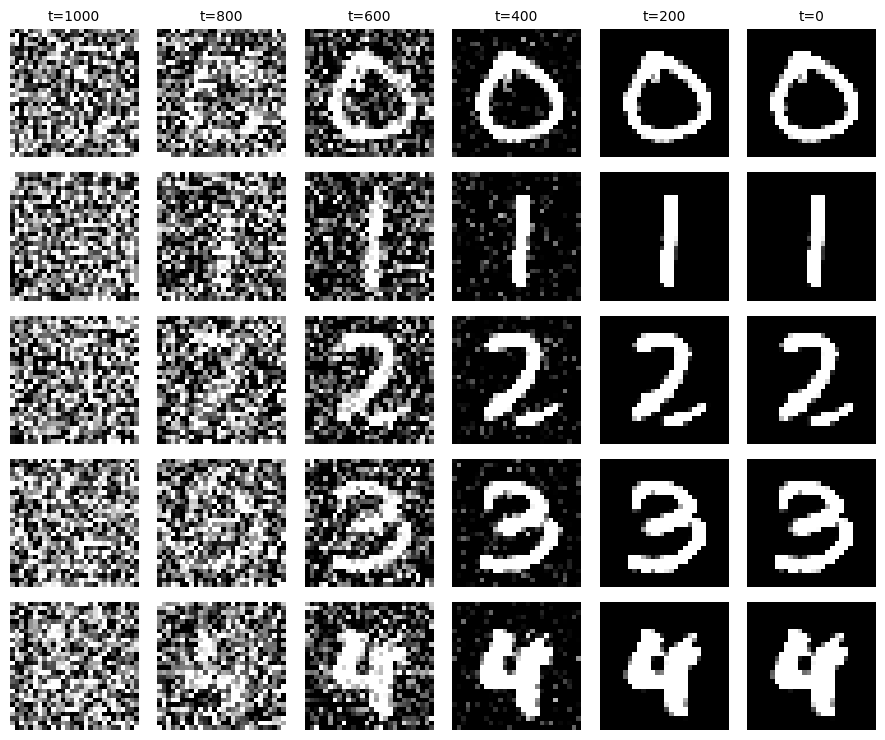

In [6]:
from PIL import Image

# 💫 Create diffusion sampler
diffusion = Diffusion(img_size=28, device=device)
plot_image_grid(
    model,
    diffusion,
    n=n_samples,
    max_steps=max_steps,
    save_dir=save_dir,
    device=device,
    num_classes=num_classes,
)

# Display the images on the notebook
out_path = os.path.join(save_dir, "all_samples_grid.png")
display(Image.open(out_path))

### 💪 Fit Laplace approximation

In [7]:
from src.models.llla_model import LaplaceApproxModel

batch_size = 128

# Prepare data loaders for the Laplace fit
train_loader, _ = get_dataloaders(batch_size=batch_size)

# Wrap diffusion model with your CustomModel for Laplace last layer approx
custom_model = LaplaceApproxModel(model, train_loader, args=None, config=None)

# Move model to device
custom_model.to(device)

# Now the custom model is fit during initialization, or you can call fit explicitly:
custom_model.fit(train_loader)

ModuleNotFoundError: No module named 'laplace'